In [78]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
X = pickle.load(open('X.pkl','rb'))
y = pickle.load(open('y.pkl','rb'))

In [4]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
X.shape

(23000, 100, 100, 3)

In [6]:
X=X/255

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = "relu"))

model.add(Dense(2, activation = "softmax"))


In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(X, y, epochs=5, validation_split = 0.1)

Epoch 1/5
647/647 [==============================] - 274s 414ms/step - loss: 0.6748 - accuracy: 0.5867 - val_loss: 0.6223 - val_accuracy: 0.6635
Epoch 2/5
647/647 [==============================] - 266s 412ms/step - loss: 0.5922 - accuracy: 0.6852 - val_loss: 0.5502 - val_accuracy: 0.7383
Epoch 3/5
647/647 [==============================] - 263s 407ms/step - loss: 0.4874 - accuracy: 0.7655 - val_loss: 0.5034 - val_accuracy: 0.7557
Epoch 4/5
647/647 [==============================] - 266s 411ms/step - loss: 0.3582 - accuracy: 0.8388 - val_loss: 0.5165 - val_accuracy: 0.7600
Epoch 5/5
647/647 [==============================] - 265s 409ms/step - loss: 0.1854 - accuracy: 0.9264 - val_loss: 0.6384 - val_accuracy: 0.7557


In [11]:
model.history.history

{'loss': [0.6748205423355103,
  0.5921854376792908,
  0.4874114990234375,
  0.3581902086734772,
  0.18539714813232422],
 'accuracy': [0.5867149829864502,
  0.6852173805236816,
  0.7655072212219238,
  0.8388406038284302,
  0.9263768196105957],
 'val_loss': [0.6222621202468872,
  0.5502260327339172,
  0.5034488439559937,
  0.5165112614631653,
  0.638378918170929],
 'val_accuracy': [0.6634782552719116,
  0.7382608652114868,
  0.7556521892547607,
  0.7599999904632568,
  0.7556521892547607]}

<function matplotlib.pyplot.show(close=None, block=None)>

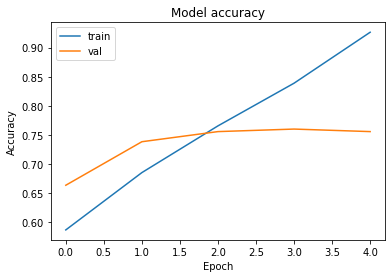

In [12]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

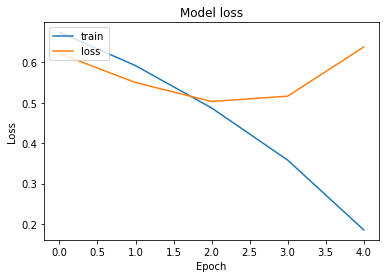

In [13]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','loss'],loc='upper left')
plt.show

In [13]:
pickle.dump(model, open('catsdogs_cnn_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://982ee0e8-b1ef-4d3f-8971-05eee6135708/assets


In [14]:
model_dir = "./model"

In [19]:
import tensorflow as tf
from tensorflow import keras

In [17]:
localhost_save_option = tf.saved_model.SaveOptions(experimental_io_device="/job:localhost")
model.save(model_dir, options=localhost_save_option)

INFO:tensorflow:Assets written to: ./model\assets


In [59]:
model2 = tf.keras.models.load_model(model_dir)

In [23]:
X.shape

(23000, 100, 100, 3)

In [32]:
X.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [33]:
y.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [24]:
X[1:100,:,:,:].shape

(99, 100, 100, 3)

In [43]:
X2=np.array(X[1:100,:,:,:])

In [38]:
X2.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [48]:
X2.shape

(99, 100, 100, 3)

In [26]:
y.shape

(23000,)

In [39]:
y2=np.array(y[1:100])

In [47]:
y2.shape

(99,)

In [55]:
model2.fit(X2, y2, epochs=5, validation_split = 0.1)

Epoch 1/5
3/3 [==============================] - 1s 465ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 2/5
3/3 [==============================] - 1s 434ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 1s 437ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 1s 435ms/step - loss: 7.2329e-04 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 1s 436ms/step - loss: 3.8423e-04 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000


In [49]:
model.type

AttributeError: 'Sequential' object has no attribute 'type'

In [52]:
tf.config.run_functions_eagerly(True)

In [53]:
model2.type

AttributeError: 'Sequential' object has no attribute 'type'

In [63]:
x3=np.array(X2[0:1,:,:,:])

In [64]:
x3.shape

(1, 100, 100, 3)

In [69]:
z = model.predict(x3)

In [70]:
z

array([[0.8832558, 0.1167442]], dtype=float32)

In [71]:
z[0]

array([0.8832558, 0.1167442], dtype=float32)

In [72]:
z[0][0]

0.8832558

In [76]:
fpath = r"C:\Users\Sarthak\Data Analytics\cat_dog_classification\uploads\cat.jpg"

In [80]:
img_arr = cv2.imread(fpath)
img_arr = cv2.resize(img_arr, (100, 100))

In [81]:
print(img_arr)

[[[102 102  95]
  [ 91  96  88]
  [ 90  94  89]
  ...
  [ 79  88 116]
  [ 66  79 109]
  [ 60  71 106]]

 [[106 104 102]
  [107 108 104]
  [ 99 104 103]
  ...
  [ 83  94 122]
  [ 73  82 114]
  [ 61  72 110]]

 [[114 119 116]
  [114 118 118]
  [110 118 121]
  ...
  [ 87  98 126]
  [ 75  84 117]
  [ 60  72 111]]

 ...

 [[160 167 180]
  [160 167 180]
  [160 167 180]
  ...
  [154 163 182]
  [156 166 185]
  [158 168 187]]

 [[155 162 175]
  [155 163 175]
  [158 165 177]
  ...
  [154 163 182]
  [157 167 186]
  [158 168 187]]

 [[151 158 170]
  [153 160 172]
  [153 160 173]
  ...
  [156 163 182]
  [159 166 186]
  [160 167 187]]]


In [82]:
img_arr = img_arr.reshape(1, 100, 100, 3)

In [83]:
print(img_arr)

[[[[102 102  95]
   [ 91  96  88]
   [ 90  94  89]
   ...
   [ 79  88 116]
   [ 66  79 109]
   [ 60  71 106]]

  [[106 104 102]
   [107 108 104]
   [ 99 104 103]
   ...
   [ 83  94 122]
   [ 73  82 114]
   [ 61  72 110]]

  [[114 119 116]
   [114 118 118]
   [110 118 121]
   ...
   [ 87  98 126]
   [ 75  84 117]
   [ 60  72 111]]

  ...

  [[160 167 180]
   [160 167 180]
   [160 167 180]
   ...
   [154 163 182]
   [156 166 185]
   [158 168 187]]

  [[155 162 175]
   [155 163 175]
   [158 165 177]
   ...
   [154 163 182]
   [157 167 186]
   [158 168 187]]

  [[151 158 170]
   [153 160 172]
   [153 160 173]
   ...
   [156 163 182]
   [159 166 186]
   [160 167 187]]]]
